Question 1

256


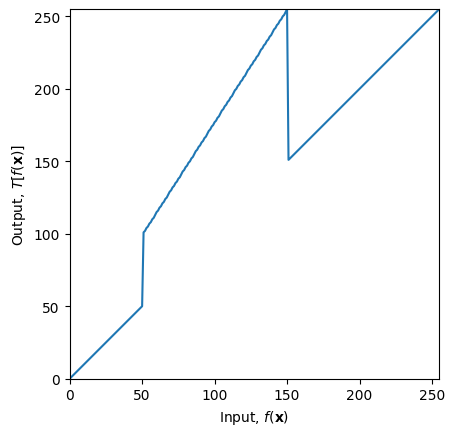

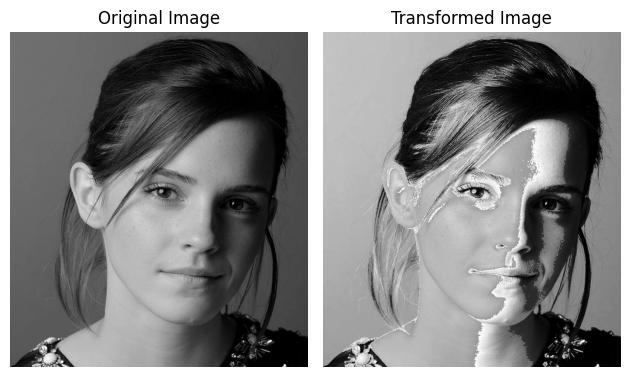

In [1]:


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(50,50),(50,100),(150,255), (150, 150)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, 255, 255 - c[3, 0]).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)



# Display the original and transformed images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')
image_transformed = cv.LUT(img_orig, transform)
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()






Question 2 

Accentuate white matter

184
0
72
256


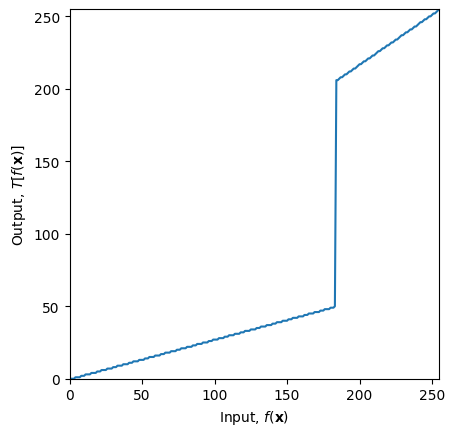

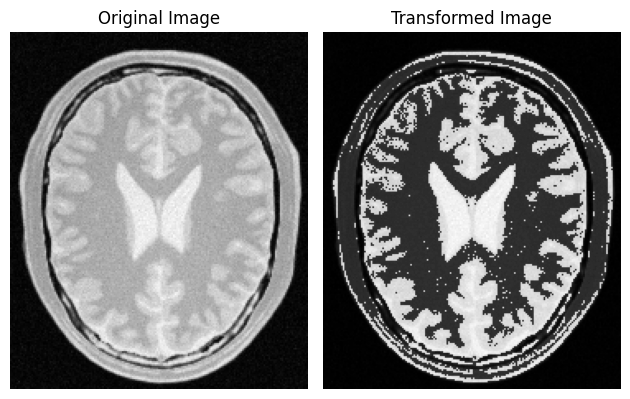

In [63]:
c = np.array([(183,50),(183,205),(205,255)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2,1]-c[1,0]).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)



# Display the original and transformed images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')
image_transformed = cv.LUT(img_orig, transform)
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Accentuate gray matter

101
0
70
0
85
256


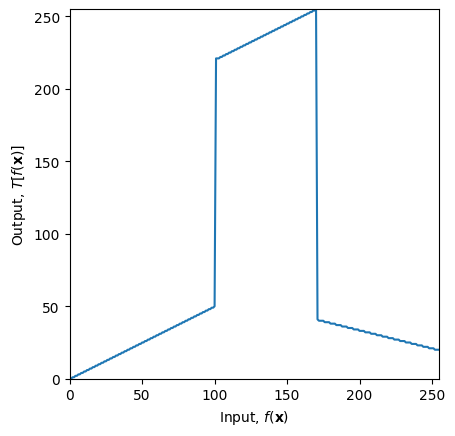

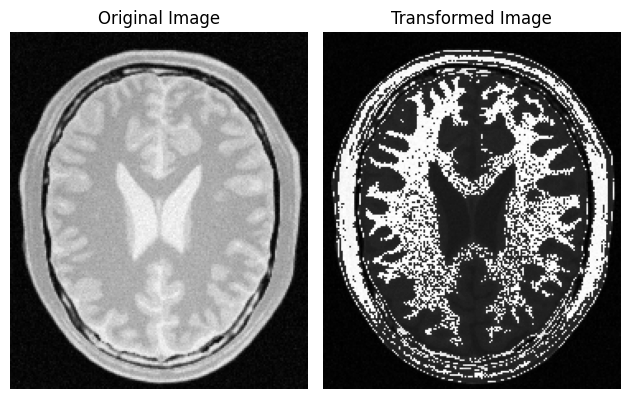

In [64]:
c = np.array([(100,50),(100,220),(170,255), (170,40)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, 20, 255 - c[3, 0]).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
# Display the original and transformed images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')
image_transformed = cv.LUT(img_orig, transform)
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Question 3

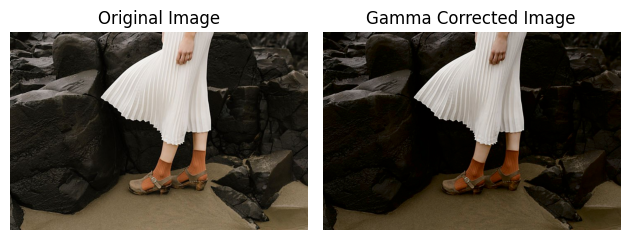

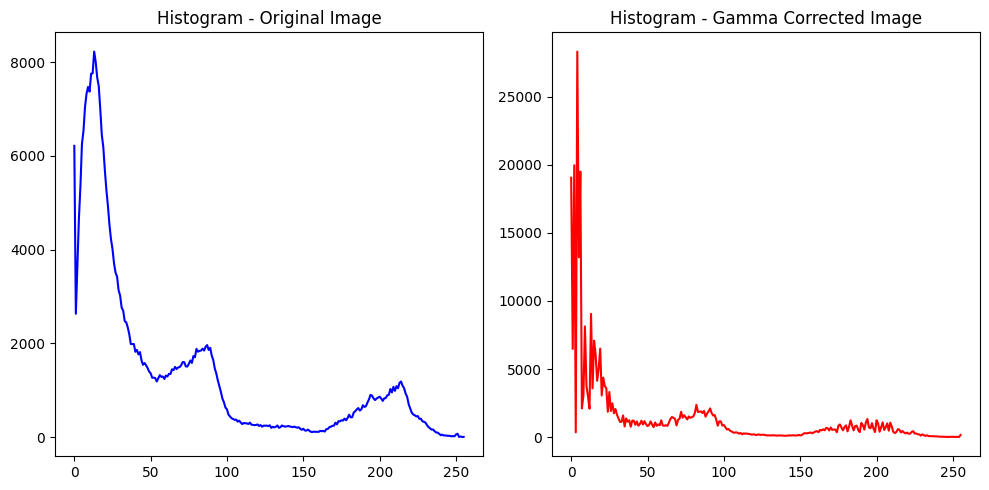

In [6]:



# Load the image
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
# Define the gamma value for gamma correction
gamma = 1.6
# Convert color spaces for plotting
img = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)  # Convert to RGB for plotting
# Convert the original image to CIELAB color space
img_orig_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
# Extract the L* channel
L_channel = img_orig_lab[:, :, 0]
# Apply gamma correction to the L* channel
L_corrected = (L_channel / 255.0) ** gamma * 255.0
# Normalize the corrected L* values
L_corrected = np.clip(L_corrected, 0, 255).astype(np.uint8)
# Replace the L* channel with the corrected values
img_orig_lab[:, :, 0] = L_corrected
# Convert the corrected CIELAB image back to the RGB color space
img_gamma_corrected = cv.cvtColor(img_orig_lab, cv.COLOR_Lab2RGB)

# Display the original and gamma-corrected images using matplotlib
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gamma_corrected)
plt.title("Gamma Corrected Image")
plt.axis('off')

plt.tight_layout()
plt.show()


fig, axarr = plt.subplots(1, 2, figsize=(10, 5))

hist_orig = cv.calcHist([img_orig], [0], None, [256], [0, 256])
axarr[0].plot(hist_orig, color='blue')
axarr[0].set_title("Histogram - Original Image")

hist_gamma = cv.calcHist([img_gamma_corrected], [0], None, [256], [0, 256])
axarr[1].plot(hist_gamma, color='red')
axarr[1].set_title("Histogram - Gamma Corrected Image")

plt.tight_layout()
plt.show()








Question 4

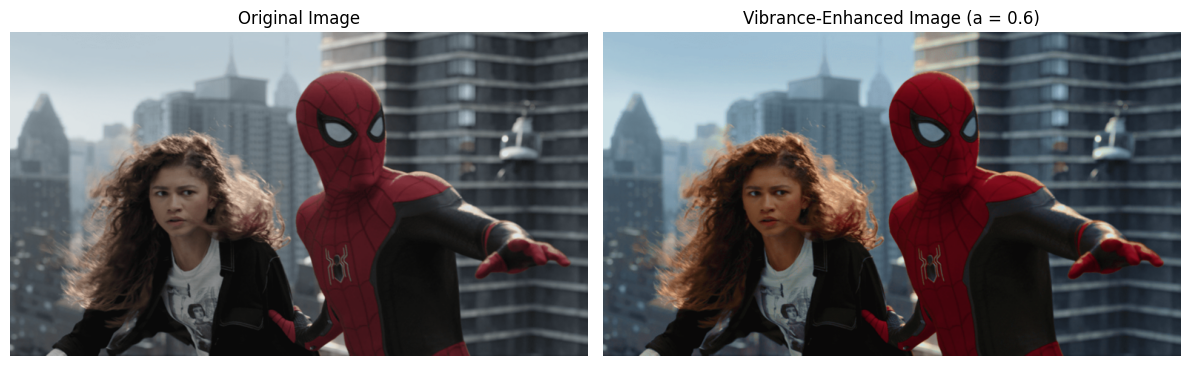

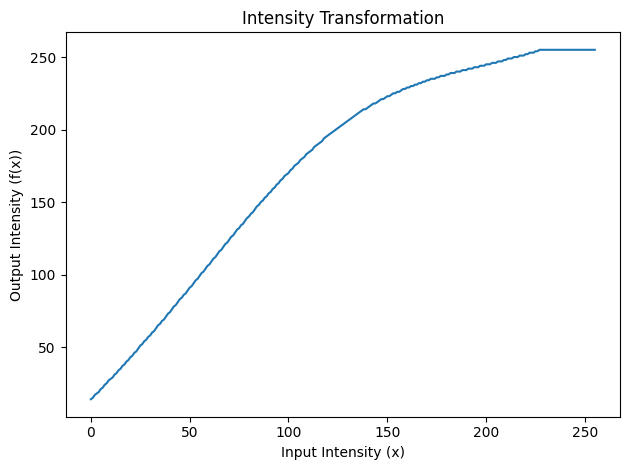

In [5]:
img_orig = cv.imread('spider (1).png', cv.IMREAD_COLOR)
img1=cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
def transform(x, a, r):
    return np.minimum(x+a*128 * np.exp(-((x - 128)) ** 2 / (2 * r ** 2)), 255)
a=0.6
table = np.array([transform(i,a,70)for i in np.arange(0, 256)]).astype('uint8')
s_t=cv.LUT(s,table)
s_t_resized = cv.resize(s_t, (h.shape[1], h.shape[0]))
image_merge = cv.merge([h, s_t_resized, v])
img_rgb = cv.cvtColor(image_merge, cv.COLOR_HSV2RGB)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title("Vibrance-Enhanced Image (a = {})".format(a))
plt.axis('off')
plt.tight_layout()
plt.show()
# Visualize the intensity transformation
x = np.arange(256) 
plt.subplot()
plt.plot(x,table)
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")

plt.tight_layout()
plt.show()



Question 5

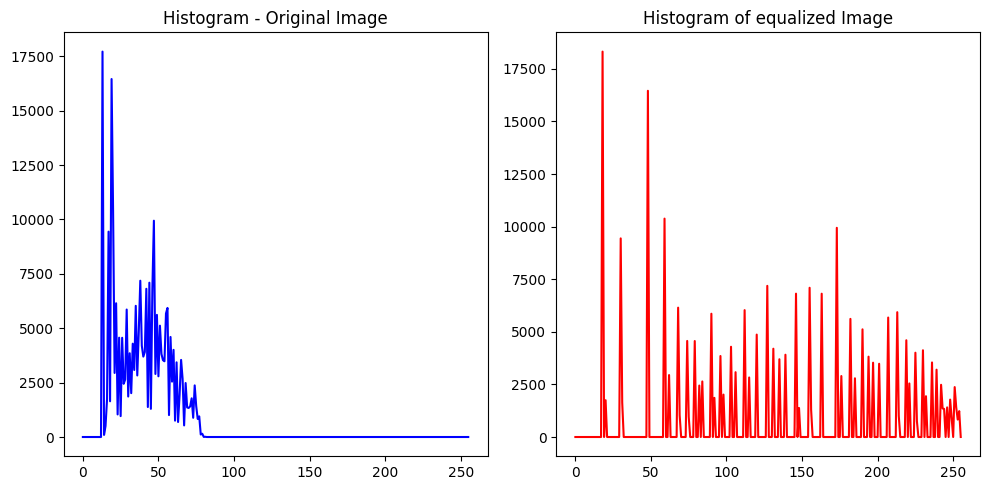

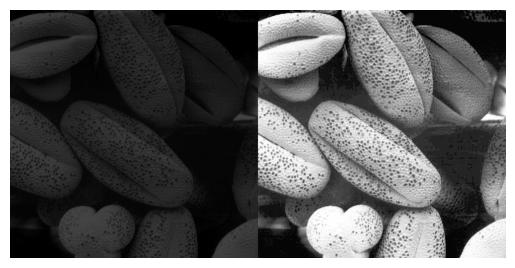

In [19]:
def histogram_equalisation(image):
    s=np.zeros(256)
    for i in range(0,256):
        if i==0:
            s[i]=np.sum(image==i)
        else:
            s[i]=s[i-1]+np.sum(image==i)
    s=s*255/(image.shape[0]*image.shape[1])
    s1=np.uint8(s)
    image_equalized =cv.LUT(image, s1)
    return image_equalized
img_orig = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
image_equalized=histogram_equalisation(img_orig)

#show histograms before and after transformation
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
hist_orig = cv.calcHist([img_orig], [0], None, [256], [0, 256])
axarr[0].plot(hist_orig, color='blue')
axarr[0].set_title("Histogram - Original Image")
hist_equalized = cv.calcHist([image_equalized], [0], None, [256], [0, 256])
axarr[1].plot(hist_equalized, color='red')
axarr[1].set_title("Histogram of equalized Image")
plt.tight_layout()
plt.show()
res = np.hstack((img_orig, image_equalized))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()

Question 6

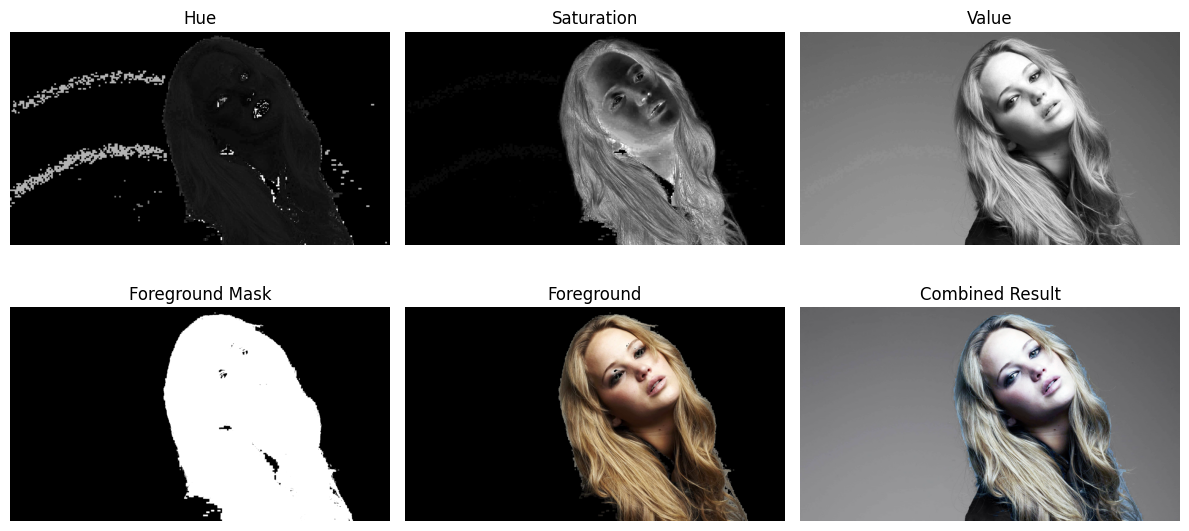

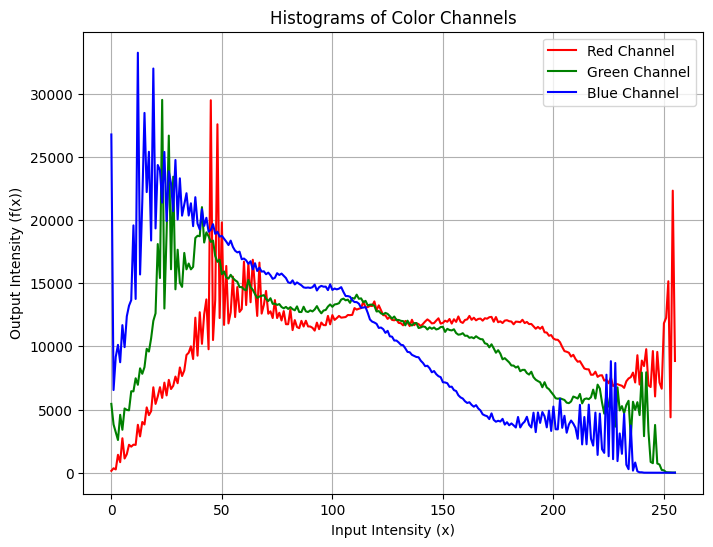

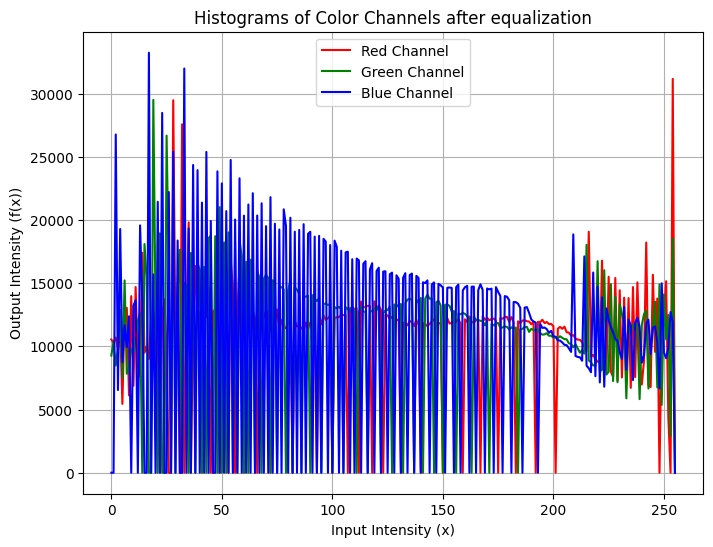

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_orig = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
# Convert the image to the HSV color space
hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
# Apply thresholding to create a binary mask for the foreground
_, mask_fore = cv.threshold(s, 14, 255, cv.THRESH_BINARY)
img_fore = cv.bitwise_and(img_orig, img_orig, mask=mask_fore)
img_fore1 = cv.cvtColor(img_fore, cv.COLOR_BGR2RGB)
# Calculate histograms for each channel of the foreground
hist_fore_b = cv.calcHist([img_fore], [0], mask_fore, [256], [0, 256])
hist_fore_g = cv.calcHist([img_fore], [1], mask_fore, [256], [0, 256])
hist_fore_r = cv.calcHist([img_fore], [2], mask_fore, [256], [0, 256])
x=np.arange(256).astype('uint8')
# Apply histogram equalization using cumulative distribution
cumsum_hist_fore_b = np.cumsum(hist_fore_b)
cumsum_hist_fore_g = np.cumsum(hist_fore_g)
cumsum_hist_fore_r = np.cumsum(hist_fore_r)
b_equ = (cumsum_hist_fore_b * 255 / cumsum_hist_fore_b[-1]).astype(np.uint8)
g_equ = (cumsum_hist_fore_g * 255 / cumsum_hist_fore_g[-1]).astype(np.uint8)
r_equ = (cumsum_hist_fore_r * 255 / cumsum_hist_fore_r[-1]).astype(np.uint8)
equalized_b = cv.LUT(img_fore[:, :, 0], b_equ)
equalized_g = cv.LUT(img_fore[:, :, 1], g_equ)
equalized_r = cv.LUT(img_fore[:, :, 2], r_equ)
hist_fore_b_equ = cv.calcHist([equalized_b], [0], mask_fore, [256], [0, 256])
hist_fore_g_equ = cv.calcHist([equalized_g], [0], mask_fore, [256], [0, 256])
hist_fore_r_equ = cv.calcHist([equalized_r], [0], mask_fore, [256], [0, 256])
equalized_foreground_bgr = cv.merge((equalized_b, equalized_g, equalized_r))
# Create a mask for the background
mask_bg = cv.bitwise_not(mask_fore)
# Extract the background from the original image
background = cv.bitwise_and(img_orig, img_orig, mask=mask_bg)
# Combine equalized foreground with the original background
result_image = cv.add(background, equalized_foreground_bgr)
result_image = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)
# Display the result hue, saturation, and value images, foreground mask, foreground, and combined result
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_fore, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_fore1)
plt.title('Foreground')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(result_image)
plt.title('Combined Result')
plt.axis('off')

plt.tight_layout()
plt.show()
#plot histograms of before equalization of 3 channels in the same plot
plt.figure(figsize=(8, 6))
plt.plot(x, hist_fore_r, color='red', label='Red Channel')
plt.plot(x, hist_fore_g, color='green', label='Green Channel')
plt.plot(x, hist_fore_b, color='blue', label='Blue Channel')
plt.title("Histograms of Color Channels")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")
plt.legend()
plt.grid()
plt.show()
#plot histograms of after equalization of 3 channels in the same plot
plt.figure(figsize=(8, 6))
plt.plot(x, hist_fore_r_equ, color='red', label='Red Channel')
plt.plot(x, hist_fore_g_equ, color='green', label='Green Channel')
plt.plot(x, hist_fore_b_equ, color='blue', label='Blue Channel')
plt.title("Histograms of Color Channels after equalization")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output Intensity (f(x))")
plt.legend()
plt.grid()
plt.show()












Question 7

part a

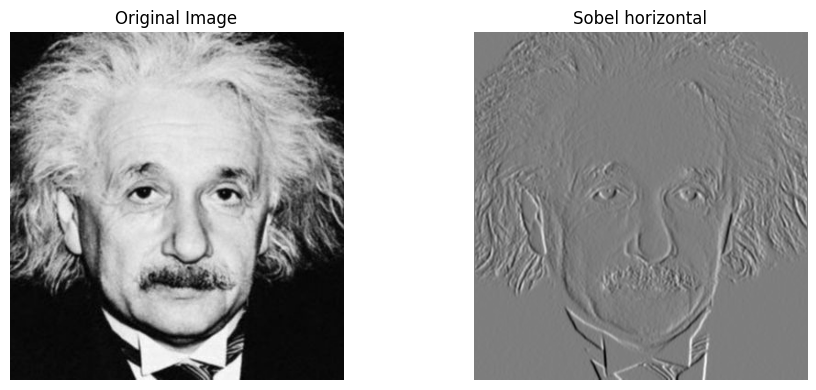

In [13]:
img_orig = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
kernel_h=np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float32)
img_h = cv.filter2D(img_orig,-1, kernel_h)
#plot the original image and the horizontal edge image
fig, axarr = plt.subplots(1, 2, figsize=(10, 4))
axarr[0].imshow(img_orig, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')
axarr[1].imshow(img_h, cmap='gray')
axarr[1].set_title('Sobel horizontal')
axarr[1].axis('off')
plt.tight_layout()
plt.show()




part b

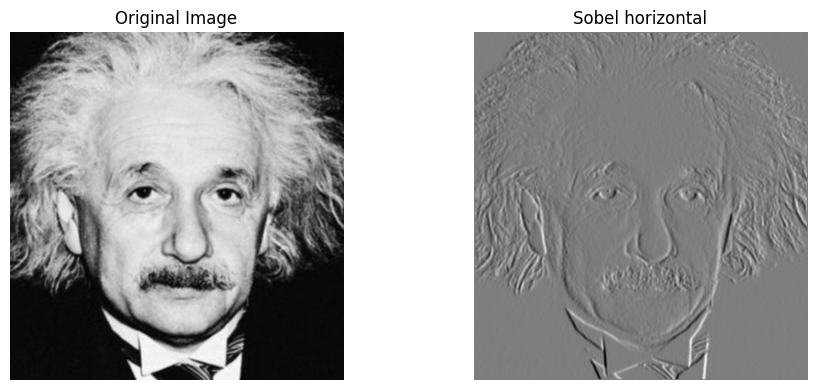

In [16]:
def sobel_fiter(image):
    kernel_h=np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float32)
    result_h=np.zeros(image.shape,dtype=np.float32)
    kh_h=int(kernel_h.shape[0]/2)
    kh_w=int(kernel_h.shape[1]/2)
    image = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)   
    #print(kh_h,kh_w,kv_h,kv_w)
    for i in range(kh_h, image.shape[0] - kh_h):
        for j in range(kh_w, image.shape[1] - kh_w):
            result_h[i, j] = np.dot(image[i - kh_h : i + kh_h + 1, j - kh_w : j + kh_w + 1].flatten(), kernel_h.flatten())
    return result_h
img_orig = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
img_h=sobel_fiter(img_orig)
#plot the images
fig, axarr = plt.subplots(1, 2, figsize=(10, 4))
axarr[0].imshow(img_orig, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')
axarr[1].imshow(img_h, cmap='gray')
axarr[1].set_title('Sobel horizontal')
axarr[1].axis('off')
plt.tight_layout()
plt.show()


part c

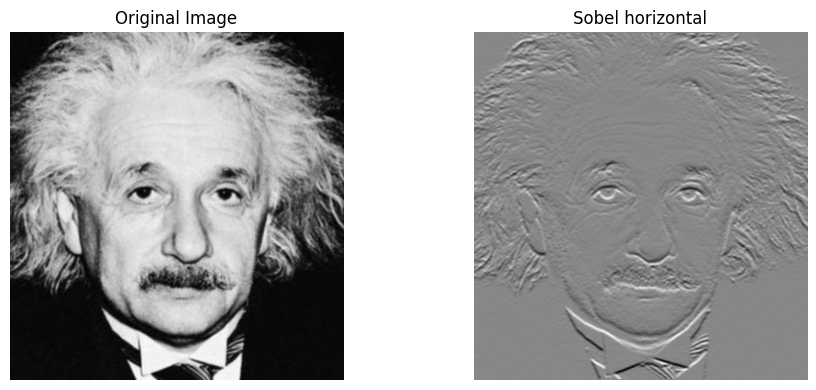

In [15]:
img_orig = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
kernel_h=np.array([1,2,1],dtype=np.float32)
kernel_v=np.array([-1,0,1],dtype=np.float32)
img_h=cv.sepFilter2D(img_orig,-1,kernel_h,kernel_v)
fig, axarr = plt.subplots(1, 2, figsize=(10, 4))
axarr[0].imshow(img_orig, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')
axarr[1].imshow(img_h, cmap='gray')
axarr[1].set_title('Sobel horizontal')
axarr[1].axis('off')
plt.tight_layout()
plt.show()

Question 8

SSD for nearest neighbor interpolation: 16.792970920138888
SSD for bilinear interpolation: 14.256099826388889


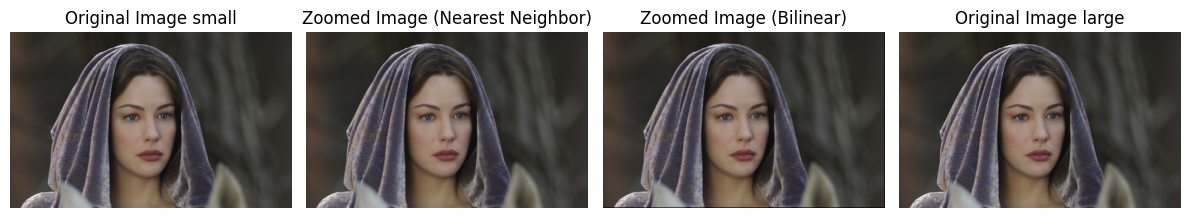

In [3]:
import numpy as np
#from PIL import Image
def nearest_neighbor(img, zoom_factor):
    x, y, num_channels = img.shape
    x_new = int(x * zoom_factor)
    y_new = int(y * zoom_factor)
    new_image = np.zeros((x_new, y_new, num_channels), dtype=np.float32)
    for i in range(x_new):
        for j in range(y_new):
            x1=int(round(i/zoom_factor))
            y1=int(round(j/zoom_factor))
            if x1>=x:
                x1=x-1
            if y1>=y:
                y1=y-1 
            new_image[i,j,0]=img[x1,y1,0]
            new_image[i,j,1]=img[x1,y1,1]
            new_image[i,j,2]=img[x1,y1,2]
    return new_image.astype(np.uint8)

def bilinear_interpolation(img, zoom_factor):
    x, y, num_channels = img.shape
    x_new = int(x * zoom_factor)
    y_new = int(y * zoom_factor)
    new_image = np.zeros((x_new, y_new, num_channels), dtype=np.float32)
    for i in range(x_new):
        for j in range(y_new):
            x1=i/zoom_factor
            x1_int=int(i/zoom_factor)   
            x2=x1_int+1
            y1=int(j/zoom_factor)
            y1_int=int(j/zoom_factor)
            y2=y1_int+1
            if x2>=x:
                x2=x1_int
            if y2>=y:
                y2=y1_int
            h1_0=(x2-x1)*img[x1_int,y1_int,0]+(x1-x1_int)*img[x2,y1_int,0]
            h2_0=(x2-x1)*img[x1_int,y2,0]+(x1-x1_int)*img[x2,y2,0]
            new_image[i,j,0]=(y2-y1)*h1_0+(y1-y1_int)*h2_0
            h1_1=(x2-x1)*img[x1_int,y1_int,1]+(x1-x1_int)*img[x2,y1_int,1]
            h2_1=(x2-x1)*img[x1_int,y2,1]+(x1-x1_int)*img[x2,y2,1]
            new_image[i,j,1]=(y2-y1)*h1_1+(y1-y1_int)*h2_1
            h1_2=(x2-x1)*img[x1_int,y1_int,2]+(x1-x1_int)*img[x2,y1_int,2]
            h2_2=(x2-x1)*img[x1_int,y2,2]+(x1-x1_int)*img[x2,y2,2]
            new_image[i,j,2]=(y2-y1)*h1_2+(y1-y1_int)*h2_2
    return new_image.astype(np.uint8)

def zooming(img, zoom_factor, interpolation):
    if interpolation == 'nearest':
        return nearest_neighbor(img, zoom_factor)
    elif interpolation == 'bilinear':
        return bilinear_interpolation(img, zoom_factor)
    else:
        raise ValueError("Unknown interpolation method: {}".format(interpolation))
    
# Load the image
img_small=cv.imread('zooming//zooming//im02small.png', cv.IMREAD_COLOR)
img_large=cv.imread('zooming//zooming//im02.png', cv.IMREAD_COLOR)
img_small_1=cv.cvtColor(img_small,cv.COLOR_BGR2RGB)
img_large_1=cv.cvtColor(img_large,cv.COLOR_BGR2RGB)
# Zoom the image using nearest neighbor interpolation
img_zoomed_nn = zooming(img_small, 4, 'nearest')
img_zoomed_nn_1=cv.cvtColor(img_zoomed_nn,cv.COLOR_BGR2RGB)
# Zoom the image using bilinear interpolation
img_zoomed_bl = zooming(img_small, 4, 'bilinear')
img_zoomed_bl_1=cv.cvtColor(img_zoomed_bl,cv.COLOR_BGR2RGB)
# Calculate SSD
ssd_nn = np.sum((img_large - img_zoomed_nn) ** 2)
ssd_bl = np.sum((img_large - img_zoomed_bl) ** 2)
#normalize ssd
h,w,c=img_large.shape
ssd_nn=ssd_nn/(h*w*c)
ssd_bl=ssd_bl/(h*w*c)
print("SSD for nearest neighbor interpolation: {}".format(ssd_nn))
print("SSD for bilinear interpolation: {}".format(ssd_bl))

# Display the original and zoomed images
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_small_1)
plt.title("Original Image small")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(img_zoomed_nn_1)
plt.title("Zoomed Image (Nearest Neighbor)")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(img_zoomed_bl_1)
plt.title("Zoomed Image (Bilinear)")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(img_large_1)
plt.title("Original Image large")
plt.axis('off')
plt.tight_layout()
plt.show()







Question 9

part a

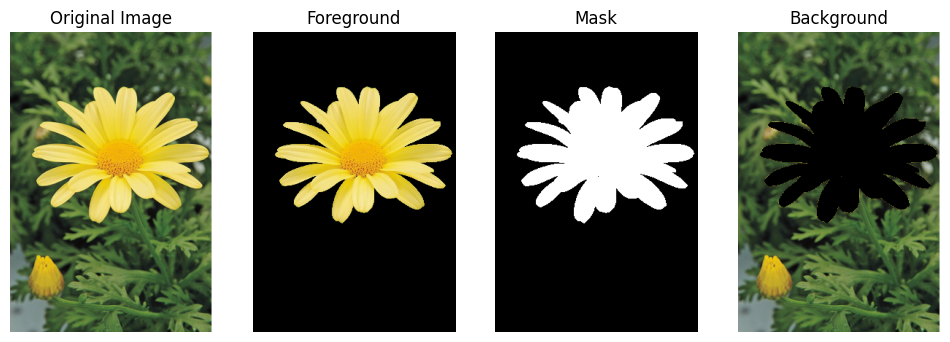

In [9]:
img_orig = cv.imread('Screenshot.png', cv.IMREAD_COLOR)
h, w, _ = img_orig.shape
mask=np.zeros((h,w),dtype=np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect=(0,0,h,w)
cv.grabCut(img_orig,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_orig1 = img_orig*mask2[:,:,np.newaxis]
img_back=cv.subtract(img_orig,img_orig1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(img_orig1, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(mask2, cmap='gray')
plt.title('Mask')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(img_back,cv.COLOR_BGR2RGB))
plt.title('Background')
plt.axis('off')
plt.show()


part B

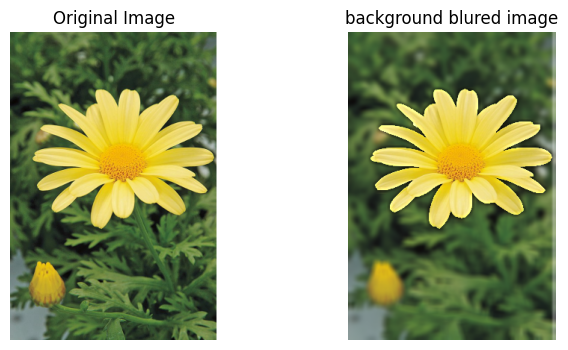

In [8]:
ksize = (9,9)
image = cv.blur(img_back, ksize, cv.BORDER_DEFAULT)
img_enc=cv.add(image,img_orig1)
plt.figure(figsize=(8, 4)) 
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_enc,cv.COLOR_BGR2RGB))
plt.title('background blured image')
plt.axis('off')
plt.show()
